# Introdução aos Métodos Discretos

Nome: Yago Pereira dos Anjos Santos

1) Utilizando os metodos numéricos aprendidos resolva o modelo de Lotka-Volterra
\begin{equation*}
    \begin{cases}
        \displaystyle \frac{d L}{dt} & = \alpha L - \beta L A\\
        \displaystyle \frac{d A}{dt} & = \delta LA - \gamma A\\
    \end{cases}
\end{equation*}


Simule 20 u.t. utilizando 101 passos de tempo, os parâmetros $\alpha =\beta =\gamma =\delta =1$ e condições iniciais $L_0=2.0$ e $A_0=1.0$. Como ficou a simulação?
        
a) Utilizando Euler Explícito
        
b) Utilizando Euler Implícito

Utilizando os parâmetros dado pelo problema, o sistema de EDO toma a seguinte forma:
\begin{cases}
    \dfrac{dL}{dt} = L - L\,A \\
    \dfrac{dA}{dt} = L\,A - A.
\end{cases}
Utilizando as condições iniciais, $L_{0} = 2.0$ e $A_{0} = 1.0$, é feita a simulação em Python a seguir. Com 20 u.t. e 101 passos de tempo, temos 101 pontos e 100 subintervalos de $[0, 20]$, de modo que $h = \frac{20 - 0}{100} = 0.2$. Na simulação do modelo com o método de Euler Explícito (imagem plotada à esquerda), observa-se flutuações entre as soluções no início da simulação entre os instantes de tempo de $t = 0.0$ até $t = 10.0$. Conforme o tempo avança, observa-se um comportamento incomum para o modelo de Lotka-Volterra com o aumento brusco das populações $L$ e $A$ envolvidas seguido de quedas abruptas nas populações. Além disso, entre os instantes de tempo de $t = 15.0$ e $t = 20.0$ observa-se também que a população $L$ atinge valores muito pequenos chegando assumir valor negativo, o que não condiz interpretação física realística. Esse comportamente inconsistente do fenômeno em questão se deve a instabilidade do método de Euler. Para que a simulação seja eficiente, o método de Euler exige passos de tempo muito pequenos. Aqui, o passo de tempo $h = 0.2$ não é pequeno o suficiente para representar o comportamento qualitativo do sistema em questão, de modo que o método se mostra ineficiente.

Na simulação do modelo com o método de Euler Implítico, ao contrário do que vimos com o método explícito, observa-se um comportamento mais estável e suave entre as soluções, possibilitando assim uma interpretação mais realista e condizente com o fenômeno Presa-Predador de Lotka-Volterra. Na simulação observa-se um comportamento oscilatório das soluções com uma diferença de fase entre elas indicando que enquanto uma população cresce, a outra descresce e vice-versa, com a diminuição da amplitude das mesmas ao longo do tempo, tendendo a um ponto de equilíbrio (onde as duas populações atingem o ponto $(L, A) = (1, 1)$). Portanto, o método de Euler implícito se mostra mais estável para representação qualitativa do fenômeno. (No caso implícito, foi utilizada a função `root` da biblioteca `scipy.optimize` para a solução do sistema não-linear pelo método de Newton).

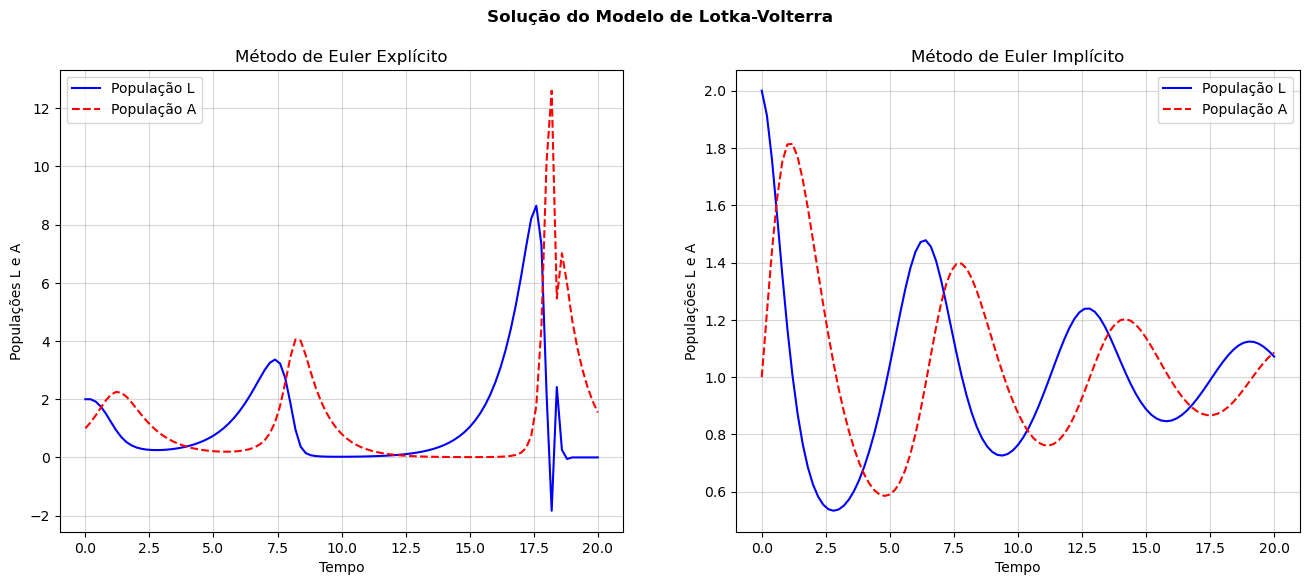

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root


''' Definindo o sistema de EDOs '''


def f(y):
    L, A = y
    dLdt = L - L*A
    dAdt = L*A - A
    return np.array([dLdt, dAdt])


''' Implementação do método de Euler explícito '''


def forward_euler(f, t_span, u0, N):
    t = np.zeros(N)
    # Vetor solução (Primeira coluna é a População L e a segunda coluna é a população A)
    y = np.zeros((N, len(u0)))
    h = (t_span[-1] - t_span[0])/(N-1)
    t[0] = t_span[0]
    y[0] = u0
    for n in range(N-1):
        t[n+1] = t[n] + h
        y[n+1] = y[n] + h*f(y[n])
    return t, y


''' Implementação do método de Euler implícito '''


def backward_euler(f, t_span, u0, N):
    t = np.zeros(N)
    # Vetor solução (Primeira coluna é a População L e a segunda coluna é a população A)
    y = np.zeros((N, len(u0)))
    h = (t_span[-1] - t_span[0])/(N-1)
    t[0] = t_span[0]
    y[0] = u0
    for n in range(N-1):
        y_n = y[n] # Palpite inicial pelo método explícito

        def eq_implicita(y_next):
            return y_next - y_n - h * f(y_next)

        sol = root(eq_implicita, y_n)
        t[n+1] = t[n] + h
        y[n+1] = sol.x
    return t, y


''' Definido as condições iniciais, intervalo de tempo e número de passos '''
u0 = np.array([2.0, 1.0])
t_span = [0, 20]
N = 101

''' Obtendo soluções a partir dos métodos implementados '''
t1, y1 = forward_euler(f, t_span, u0, N)
t2, y2 = backward_euler(f, t_span, u0, N)

''' Plotando os resultados obtidos pelos métoos de Euler explícito e implícito '''
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(t1, y1[:, 0], color='blue', label='População L')
plt.plot(t1, y1[:, 1], color='red', ls='--', label='População A')
plt.title('Método de Euler Explícito')
plt.legend()
plt.ylabel('Populações L e A')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.subplot(1, 2, 2)
plt.plot(t2, y2[:, 0], color='blue', label='População L')
plt.plot(t2, y2[:, 1], color='red', ls='--', label='População A')
plt.title('Método de Euler Implícito')
plt.legend()
plt.ylabel('Populações L e A')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.suptitle('Solução do Modelo de Lotka-Volterra', fontweight='bold')
plt.show()

2) Simule uma reação enzimática pelo modelo de Michaeles-Menten usando o método de a) Runge-Kutta Clássico e b) Trapezio
\begin{equation*}
    \begin{cases}
        \frac{d[S]}{dt} &= k_{-1}[C] - k_{+1}[S][E]\\
        \frac{d[E]}{dt} &= (k_{-1}+k_{+2})[C] - k_{+1}[S][E]\\
        \frac{d[C]}{dt} &= -(k_{-1}+k_{+2})[C] + k_{+1}[S][E]\\
        \frac{d[P]}{dt} &= k_{+2}[C]
    \end{cases}
\end{equation*}

Utilize as condições iniciais: $s_0=10.0$, $e_0=2.0$ e $c_0=p_0=0.0$; e parâmetros $k_{1+} = 0.01$, $k_{1-} = 0.02$ e $k_{2+} = 0.03$.

Substituindo os parâmetros $k_{1+} = 0.01$, $k_{1-} = 0.02$ e $k_{2+} = 0.03$ no sistema de EDOs, obtemos:
\begin{cases}
    \dfrac{d[S]}{dt} = 0.02[C]-0.01[S][E] \\
    \dfrac{d[E]}{dt} = 0.05[C]-0.01[S][E] \\
    \dfrac{d[C]}{dt} = -0.05[C]+0.01[S][E] \\
    \dfrac{d[P]}{dt} = 0.03[C].
\end{cases}
Utilizando as condições iniciais $s_{0} = 10.0$, $e_{0} = 2.0$ e $c_{0} = p_{0} = 0.0$, foram implementados os métodos de Runge-Kutta clássico e do Trapézio para a solução do sistema. Assim como no exercício anterior, a simulação foi feita com 20 u.t. com 101 passos de tempo. Logo, visualizando a plotagem das soluções a partir do algoritmo abaixo, observamos que ambos os métodos (Runge-Kutta clássico e Trapézio) nos possibilitam uma boa interpretação do fenômeno de reação enzimática pelo modelo de Michaeles-Menten.

Soluções com Runge-Kutta clássico:


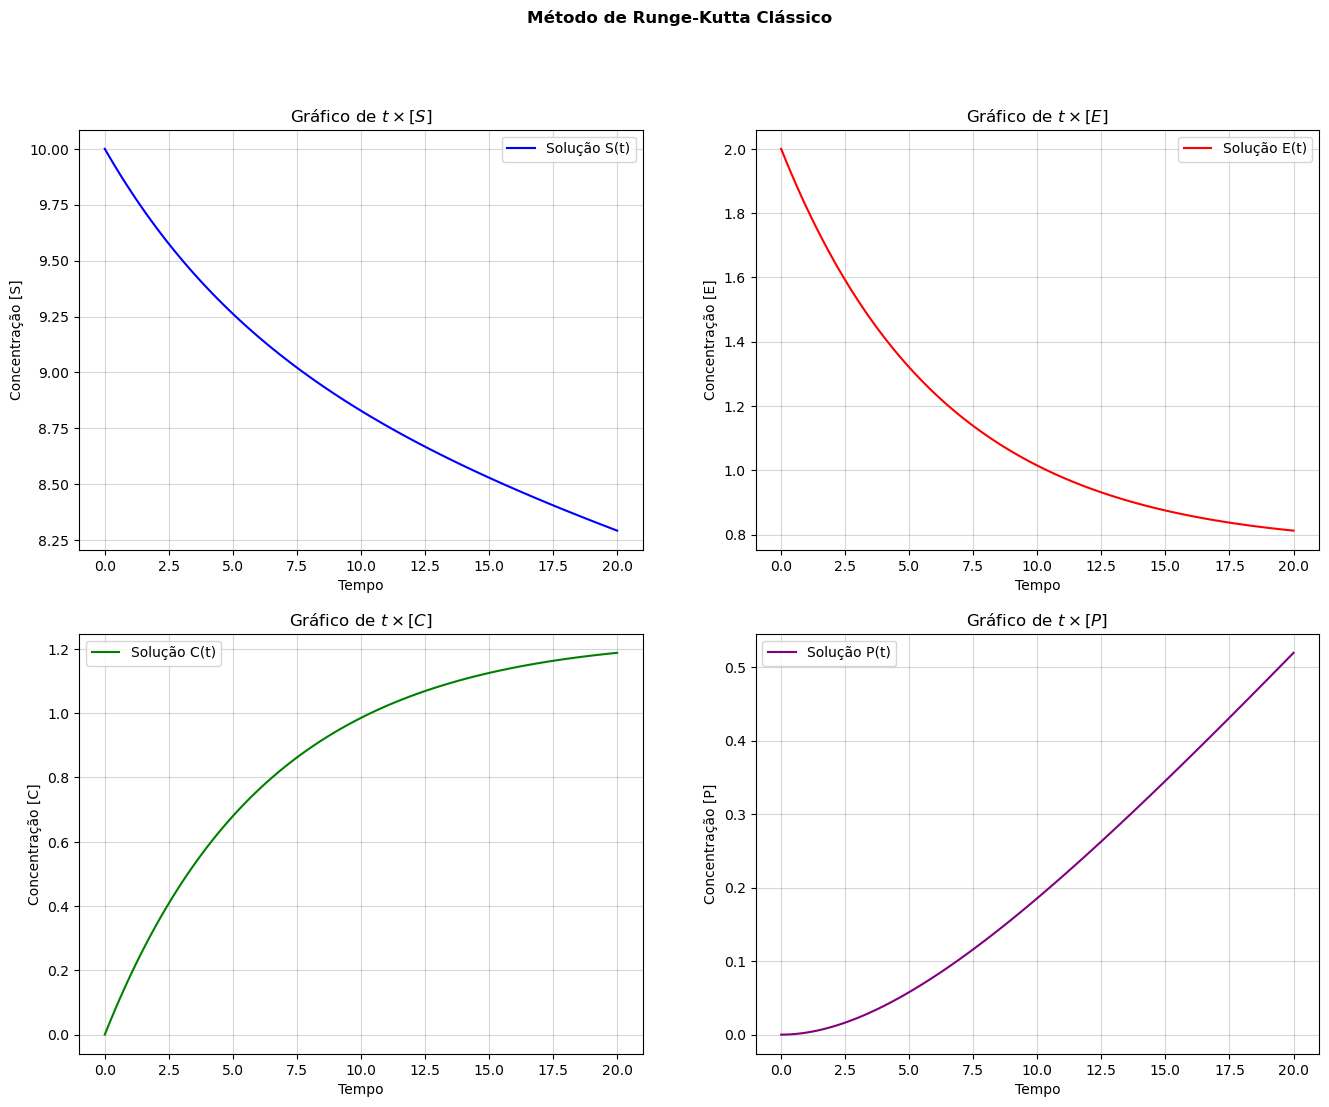

Soluções com o método do Trapézio:


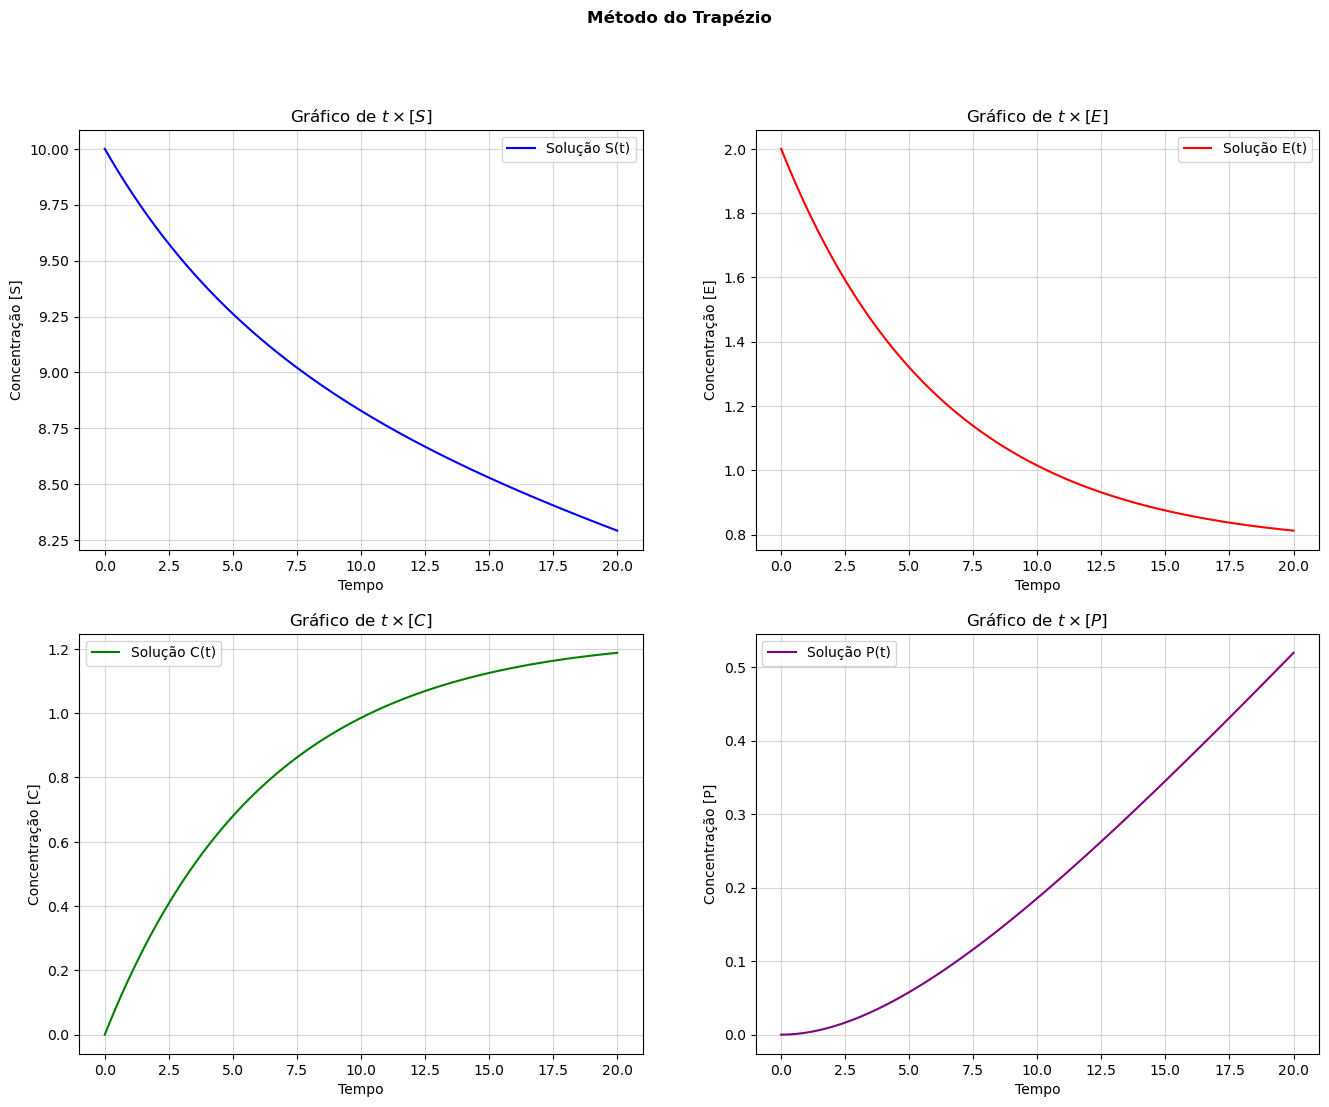

In [2]:
''' Definindo o sistema de EDOs '''


def f(t, y):
    S, E, C, P = y
    dSdt = 0.02*C - 0.01*S*E
    dEdt = 0.05*C - 0.01*S*E
    dCdt = -0.05*C + 0.01*S*E
    dPdt = 0.03*C
    return np.array([dSdt, dEdt, dCdt, dPdt])


''' Implementação do método de Runge-Kutta clássico '''


def runge_kutta_classico(f, t_span, u0, N):
    t = np.zeros(N)
    y = np.zeros((N, len(u0)))
    h = (t_span[-1] - t_span[0])/(N-1)
    t[0] = t_span[0]
    y[0] = u0
    for n in range(N-1):
        t[n+1] = t[n] + h
        y_1 = y[n]
        y_2 = y[n] + (h/2)*f(t[n], y_1)
        y_3 = y[n] + (h/2)*f(t[n] + h/2, y_2)
        y_4 = y[n] + h*f(t[n] + h/2, y_3)

        y[n+1] = y[n] + (h/6)*(f(t[n], y_1) + 2*f(t[n] + h/2, y_2) + 2*f(t[n] + h/2, y_3) + f(t[n], y_4))
    return t, y


''' Implementação do método do Trapézio '''


def metodo_trapezio(f, t_span, u0, N):
    t = np.zeros(N)
    y = np.zeros((N, len(u0)))
    h = (t_span[-1] - t_span[0])/(N-1)
    t[0] = t_span[0]
    y[0] = u0
    for n in range(N-1):
        y_n = y[n]

        def eq_implicita(y_next):
            return y_next - y_n - (h/2)*(f(t[n], y[n]) + f(t[n] + h, y_next))

        sol = root(eq_implicita, y_n)
        t[n+1] = t[n] + h
        y[n+1] = sol.x
    return t, y


''' Definindo condições iniciais, intervalo de tempo e número de passos '''
u0 = np.array([10.0, 2.0, 0.0, 0.0])
t_span = [0, 20]
N = 101

''' Obtendo soluções a partir dos métodos implementados '''
t1, y1 = runge_kutta_classico(f, t_span, u0, N)
t2, y2 = metodo_trapezio(f, t_span, u0, N)

print('Soluções com Runge-Kutta clássico:')
''' Plotando os resultados para o método de Runge-Kutta clássico '''
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(t1, y1[:, 0], color='blue', label='Solução S(t)')
plt.title('Gráfico de $t\\times[S]$')
plt.legend()
plt.ylabel('Concentração [S]')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 2)
plt.plot(t1, y1[:, 1], color='red', label='Solução E(t)')
plt.title('Gráfico de $t\\times[E]$')
plt.legend()
plt.ylabel('Concentração [E]')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 3)
plt.plot(t1, y1[:, 2], color='green', label='Solução C(t)')
plt.title('Gráfico de $t\\times[C]$')
plt.legend()
plt.ylabel('Concentração [C]')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 4)
plt.plot(t1, y1[:, 3], color='purple', label='Solução P(t)')
plt.title('Gráfico de $t\\times[P]$')
plt.legend()
plt.ylabel('Concentração [P]')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.suptitle('Método de Runge-Kutta Clássico', fontweight='bold')
plt.show()

print('Soluções com o método do Trapézio:')
''' Plotando os resultados para os resultados obtidos pelo método do Trapézio '''
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(t2, y2[:, 0], color='blue', label='Solução S(t)')
plt.title('Gráfico de $t\\times[S]$')
plt.legend()
plt.ylabel('Concentração [S]')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 2)
plt.plot(t2, y2[:, 1], color='red', label='Solução E(t)')
plt.title('Gráfico de $t\\times[E]$')
plt.legend()
plt.ylabel('Concentração [E]')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 3)
plt.plot(t2, y2[:, 2], color='green', label='Solução C(t)')
plt.title('Gráfico de $t\\times[C]$')
plt.legend()
plt.ylabel('Concentração [C]')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.subplot(2, 2, 4)
plt.plot(t2, y2[:, 3], color='purple', label='Solução P(t)')
plt.title('Gráfico de $t\\times[P]$')
plt.legend()
plt.ylabel('Concentração [P]')
plt.xlabel('Tempo')
plt.grid(alpha=0.5)

plt.suptitle('Método do Trapézio', fontweight='bold')
plt.show()